In [79]:
import tensorflow as tf
import os
import zipfile

# Replace with the name of your zip file
zip_file = 'LATICE DATA.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# Check the extracted contents
print(os.listdir())

['.config', 'logs', 'LATICE DATA', 'LATICE DATA.zip', 'sample_data']


In [80]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


tf.config.list_physical_devices('GPU')

[]

In [81]:

import cv2
import imghdr


data_dir = 'LATICE DATA'
os.listdir(data_dir)

['Data_Lattice_Str', 'Data TPMS']

In [82]:
os.listdir(os.path.join(data_dir, 'Data TPMS'))

['images43.jpg',
 'scell-cube-thumb.gif',
 'images28.jpg',
 'images37.jpg',
 'images49.jpg',
 'images34.jpg',
 'pbatwingcube.8.gif',
 'images5.jpg',
 'Schwarz_P_Surface.png',
 'images26.jpg',
 'batwingcube.8.gif',
 'gyroid-cube-start.gif',
 'image11.jpeg',
 'images39.jpg',
 'TPMS-a-P-surface-b-D-surface-c-G-surface-d-I-WP-surface-e-FRD-surface-f.jpg',
 'images56.jpg',
 'images42.jpg',
 'image19.jpeg',
 'images47.jpg',
 'Discretized-geometry-of-single-gyroid-within-the-cubic-unit-cell.png',
 'images69.jpg',
 'images15.jpg',
 'starfish71fakecubelet.8.gif',
 'images35.jpg',
 'images46.jpg',
 'image12.jpeg',
 'image4.jpeg',
 'di67cubelet.8.gif',
 'images70.jpg',
 'gyroid-frame038.gif',
 'images48.jpg',
 'Gyroid-forms-triply-periodic-minimal-surface-a-solid-network-or-lattice-form-b_Q320.jpg',
 'a0.109-combined.jpg',
 'images55.jpg',
 'C15P.8.gif',
 'cy-cube-thumb.gif',
 'images41.jpg',
 'images65.jpg',
 'images45.jpg',
 'octocube.2.gif',
 'images.jpg',
 'image8.jpeg',
 'image3.jpeg',
 'ima

In [83]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [84]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list LATICE DATA/Data_Lattice_Str/97c49fb6286fba43a109f84351edc6dd_display_large_35.webp
Image not in ext list LATICE DATA/Data_Lattice_Str/iIXnpER.jpg
Image not in ext list LATICE DATA/Data TPMS/scell-cube-thumb.gif
Image not in ext list LATICE DATA/Data TPMS/pbatwingcube.8.gif
Image not in ext list LATICE DATA/Data TPMS/batwingcube.8.gif
Image not in ext list LATICE DATA/Data TPMS/gyroid-cube-start.gif
Image not in ext list LATICE DATA/Data TPMS/starfish71fakecubelet.8.gif
Image not in ext list LATICE DATA/Data TPMS/di67cubelet.8.gif
Image not in ext list LATICE DATA/Data TPMS/gyroid-frame038.gif
Image not in ext list LATICE DATA/Data TPMS/C15P.8.gif
Image not in ext list LATICE DATA/Data TPMS/cy-cube-thumb.gif
Image not in ext list LATICE DATA/Data TPMS/octocube.2.gif
Image not in ext list LATICE DATA/Data TPMS/gyroid-C3.8.gif
Image not in ext list LATICE DATA/Data TPMS/N26-cube.gif
Image not in ext list LATICE DATA/Data TPMS/gyroid-8cubes.8.gif
Image not in ext lis

In [85]:
import numpy as np
from matplotlib import pyplot as plt


data = tf.keras.utils.image_dataset_from_directory('LATICE DATA')

Found 107 files belonging to 2 classes.


In [86]:
data_iterator = data.as_numpy_iterator()
data_iterator

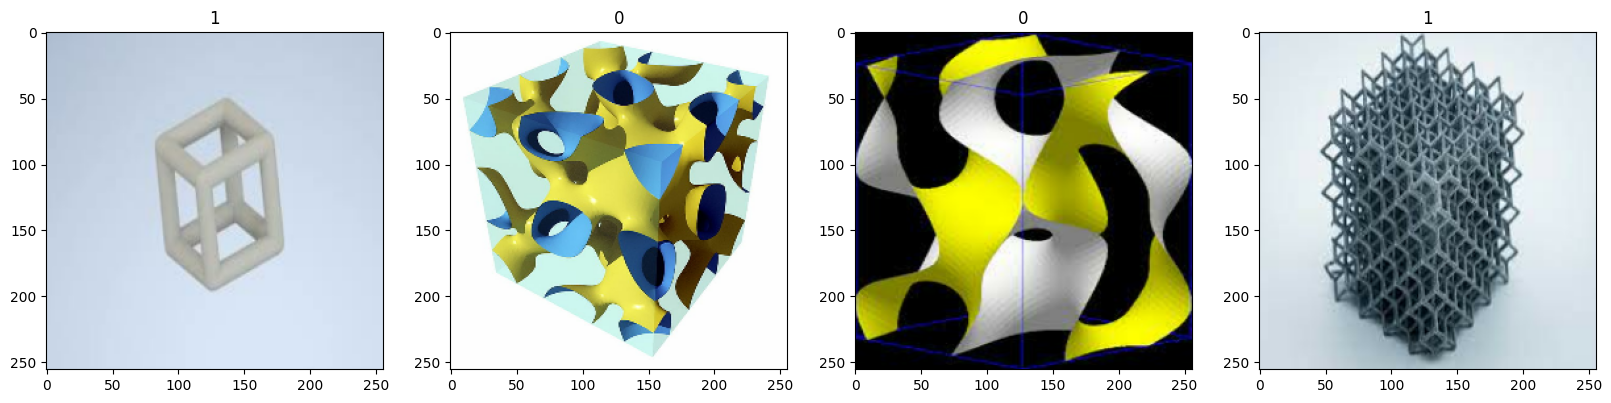

In [87]:

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [88]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

In [96]:
len(data)

4

In [102]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

test_size

1

In [104]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model = Sequential()

In [106]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [107]:
logdir='logs'

In [108]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [109]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
2/2 [==============================] - 10s 3s/step - loss: 1.7492 - accuracy: 0.5781 - val_loss: 0.6214 - val_accuracy: 0.8125
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: 0.7385 - accuracy: 0.7188 - val_loss: 0.7466 - val_accuracy: 0.5625
Epoch 3/20
2/2 [==============================] - 7s 5s/step - loss: 0.5764 - accuracy: 0.6094 - val_loss: 0.4981 - val_accuracy: 0.7812
Epoch 4/20
2/2 [==============================] - 5s 3s/step - loss: 0.4480 - accuracy: 0.8125 - val_loss: 0.5355 - val_accuracy: 0.6875
Epoch 5/20
2/2 [==============================] - 4s 2s/step - loss: 0.4147 - accuracy: 0.7656 - val_loss: 0.2486 - val_accuracy: 0.9688
Epoch 6/20
2/2 [==============================] - 7s 4s/step - loss: 0.2569 - accuracy: 0.9844 - val_loss: 0.2891 - val_accuracy: 0.9062
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 0.2385 - accuracy: 0.8750 - val_loss: 0.2335 - val_accuracy: 0.9375
Epoch 8/20
2/2 [========================

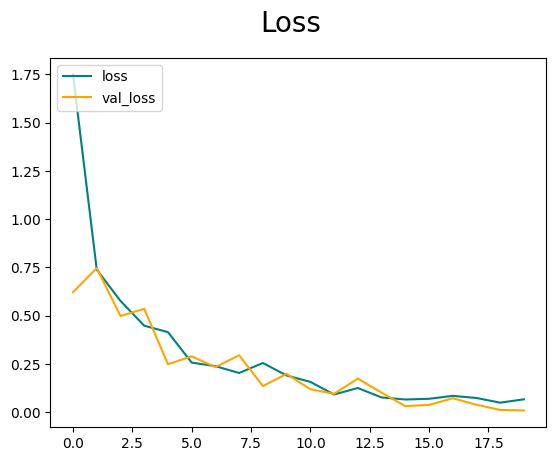

In [110]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

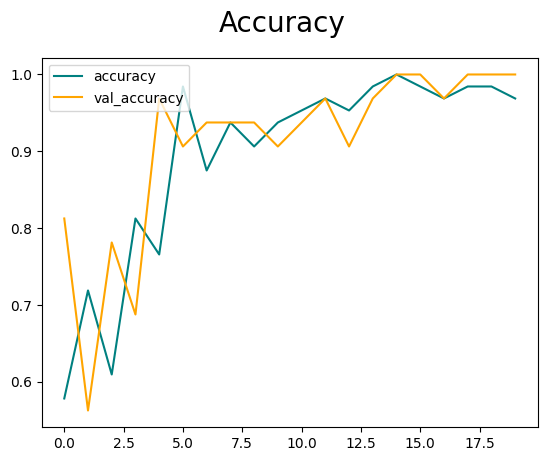

In [111]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [112]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 451ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


Test model

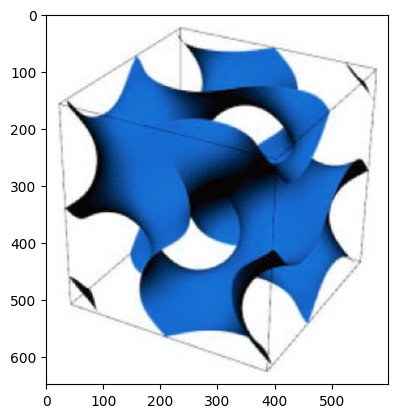

In [124]:

import cv2
img = cv2.imread('/content/TPMS-.png')
plt.imshow(img)
plt.show()


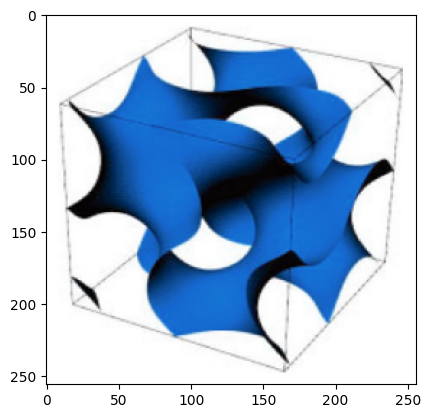

In [125]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [126]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 35ms/step


array([[0.03655795]], dtype=float32)

In [127]:
if yhat > 0.5:
    print(f'Lattice structure for lower heat transfer')
else:
    print(f'TPMS for optimum heat transfer')

TPMS for optimum heat transfer


Save model

In [128]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','structurelassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [129]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/My Drive/your_model_directory/structurelassifier.h5')

Mounted at /content/drive


In [130]:
new_model = load_model('/content/drive/My Drive/your_model_directory/structurelassifier.h5')

In [131]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 181ms/step


array([[0.03655795]], dtype=float32)